<a href="https://colab.research.google.com/github/szm5417/szm5417/blob/main/2348551_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [6]:
df=pd.read_csv('/content/drive/MyDrive/SEM_1/ML/Lab/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
                                 

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df.duplicated().sum()

0

In [12]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
print(binary_cols)

['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']


In [13]:
columns = df.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [14]:
dataset=df.drop(['CustomerId','Surname'],axis= 1)
print(dataset)

      RowNumber  CreditScore Geography  Gender  Age  Tenure    Balance  \
0             1          619    France  Female   42       2       0.00   
1             2          608     Spain  Female   41       1   83807.86   
2             3          502    France  Female   42       8  159660.80   
3             4          699    France  Female   39       1       0.00   
4             5          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995       9996          771    France    Male   39       5       0.00   
9996       9997          516    France    Male   35      10   57369.61   
9997       9998          709    France  Female   36       7       0.00   
9998       9999          772   Germany    Male   42       3   75075.31   
9999      10000          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1       

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1,3258,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2,2104,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,3,5435,289,308,0,0,21,1,0,1,0,0,4704,0
4,4,6899,1822,459,2,0,25,2,3696,0,1,1,3925,0


0    7963
1    2037
Name: churn, dtype: int64

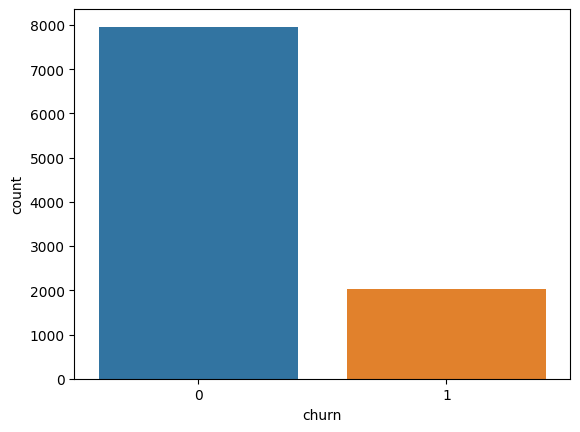

In [17]:
df["churn"] = df["Exited"]
sns.countplot(data=df, x="churn");
df["churn"].value_counts()

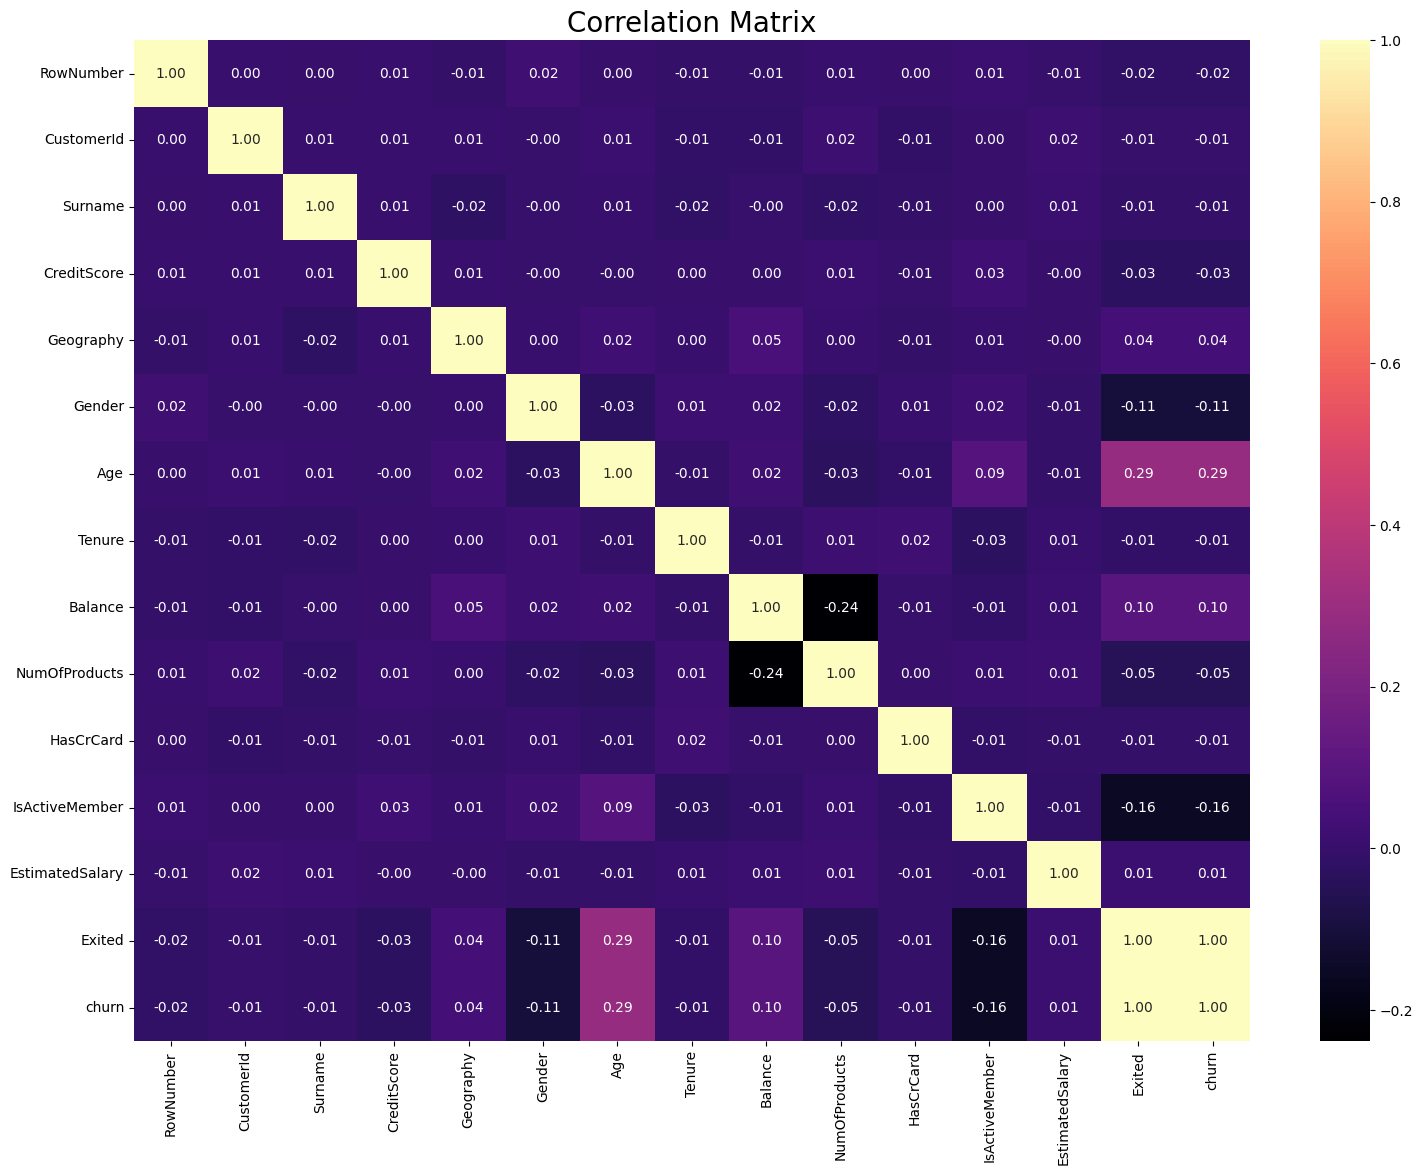

In [18]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [19]:
zscore_df = df.apply(zscore)
zscore_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,churn
0,-1.731878,-0.784099,-0.464183,-0.327331,-0.901886,-1.095988,0.293793,-1.041760,-0.958432,-0.911583,0.646092,0.970243,0.024035,1.977165,1.977165
1,-1.731531,-0.603273,-0.390911,-0.441331,1.515067,-1.095988,0.198387,-1.387538,-0.608805,-0.911583,-1.547768,0.970243,0.221848,-0.505775,-0.505775
2,-1.731185,-1.003031,0.628988,-1.539876,-0.901886,-1.095988,0.293793,1.032908,1.767524,2.527057,0.646092,-1.030670,0.245405,1.977165,1.977165
3,-1.730838,0.150862,-1.440356,0.501759,-0.901886,-1.095988,0.007575,-1.387538,-0.958432,0.807737,-1.547768,-1.030670,-0.102066,-0.505775,-0.505775
4,-1.730492,0.658006,0.371354,2.066668,1.515067,-1.095988,0.389199,-1.041760,0.780759,-0.911583,0.646092,0.970243,-0.371937,-0.505775,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177968,0.580534,1.247941,-0.901886,0.912419,0.007575,-0.004426,-0.958432,0.807737,0.646092,-1.030670,-0.059455,-0.505775,-0.505775
9996,1.730838,-1.676106,-0.203004,-1.394785,-0.901886,0.912419,-0.374048,1.724464,-0.900082,-0.911583,0.646092,0.970243,0.030617,-0.505775,-0.505775
9997,1.731185,-1.483502,0.073539,0.605396,-0.901886,-1.095988,-0.278642,0.687130,-0.958432,-0.911583,-1.547768,0.970243,-1.017340,1.977165,1.977165
9998,1.731531,-0.118992,0.989439,1.258304,0.306591,0.912419,0.293793,-0.695982,-0.757502,0.807737,0.646092,-1.030670,-0.124584,1.977165,1.977165


In [20]:
zScore= ((zscore_df > 3)|(zscore_df < -3)).sum()
zScore

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                133
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
churn                0
dtype: int64

In [21]:
outlier = (zscore_df > 3) | (zscore_df < -3)
rowOutlier =np.any(outlier, axis=1)
cleaned_data = zscore_df[~rowOutlier]
cleaned_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,churn
0,-1.731878,-0.784099,-0.464183,-0.327331,-0.901886,-1.095988,0.293793,-1.041760,-0.958432,-0.911583,0.646092,0.970243,0.024035,1.977165,1.977165
1,-1.731531,-0.603273,-0.390911,-0.441331,1.515067,-1.095988,0.198387,-1.387538,-0.608805,-0.911583,-1.547768,0.970243,0.221848,-0.505775,-0.505775
2,-1.731185,-1.003031,0.628988,-1.539876,-0.901886,-1.095988,0.293793,1.032908,1.767524,2.527057,0.646092,-1.030670,0.245405,1.977165,1.977165
3,-1.730838,0.150862,-1.440356,0.501759,-0.901886,-1.095988,0.007575,-1.387538,-0.958432,0.807737,-1.547768,-1.030670,-0.102066,-0.505775,-0.505775
4,-1.730492,0.658006,0.371354,2.066668,1.515067,-1.095988,0.389199,-1.041760,0.780759,-0.911583,0.646092,0.970243,-0.371937,-0.505775,-0.505775


In [22]:
zScore= ((cleaned_data > 3)|(cleaned_data < -3)).sum()
zScore

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
churn              0
dtype: int64

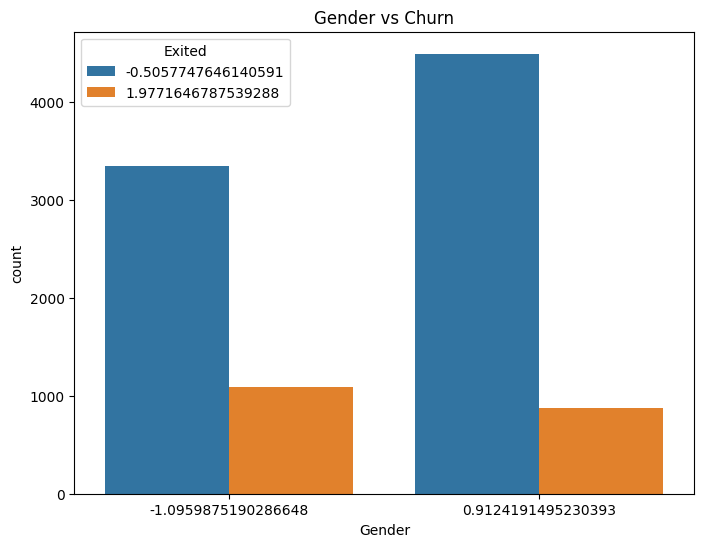

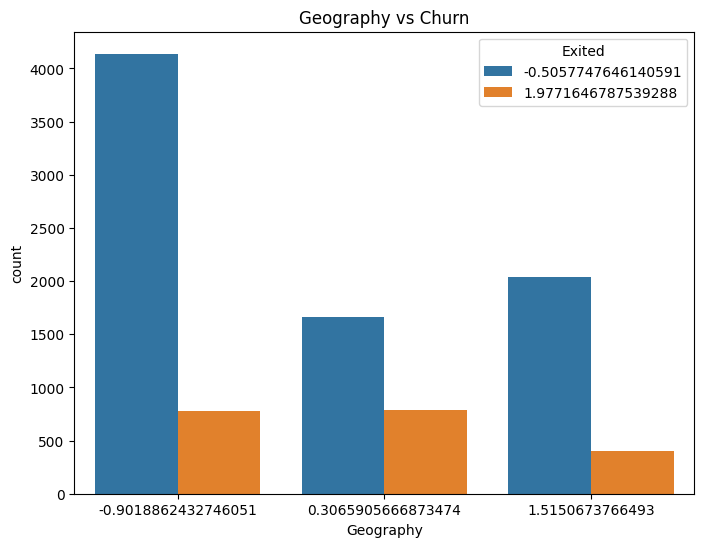

In [23]:
categorical_vars = ["Gender", "Geography"]
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=cleaned_data, x=var, hue="Exited")
    plt.title(f"{var} vs Churn")
    plt.show()

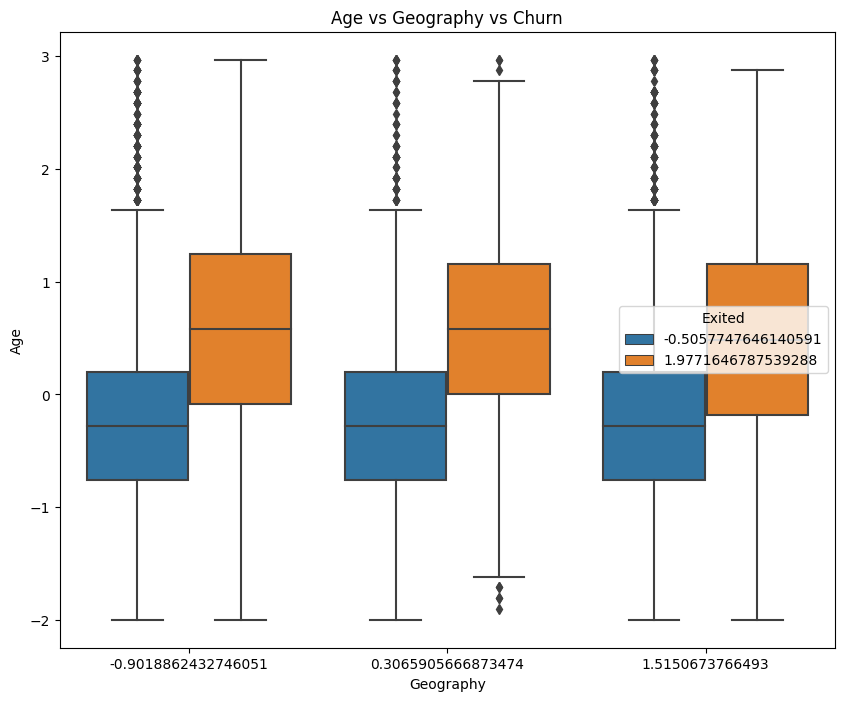

In [24]:
numeric_var = "Age"
categorical_var = "Geography"
plt.figure(figsize=(10, 8))
sns.boxplot(data=cleaned_data, x=categorical_var, y=numeric_var, hue="Exited")
plt.title(f"{numeric_var} vs {categorical_var} vs Churn")
plt.show()

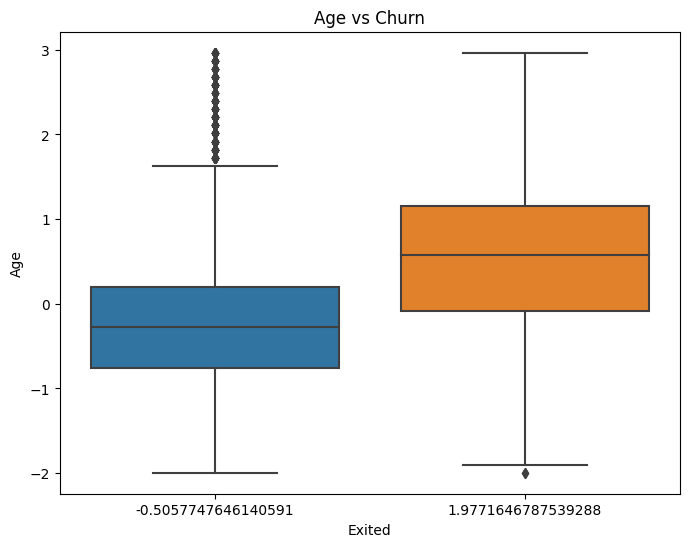

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x="Exited", y="Age")
plt.title("Age vs Churn")
plt.show()

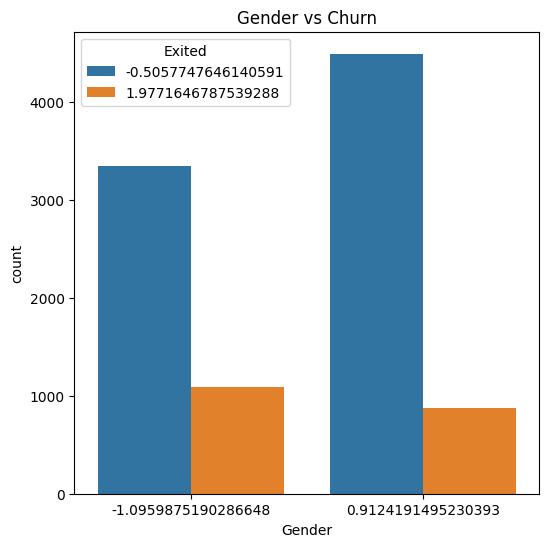

In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_data, x="Gender", hue="Exited")
plt.title("Gender vs Churn")
plt.show()

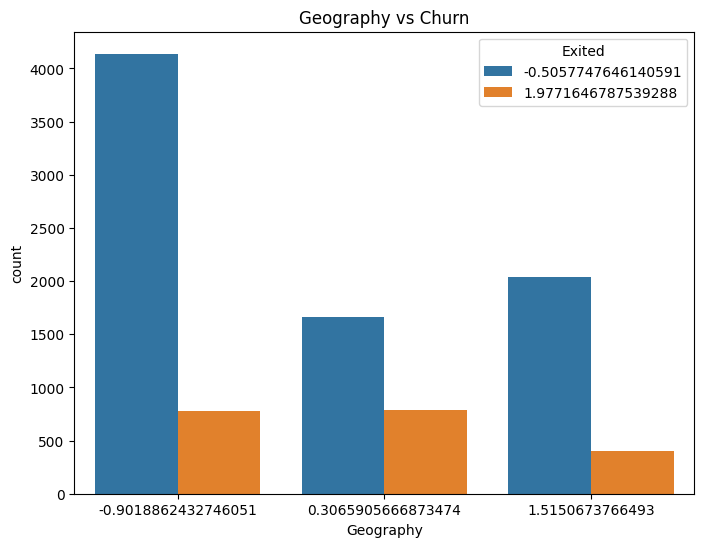

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_data, x="Geography", hue="Exited")
plt.title("Geography vs Churn")
plt.show()


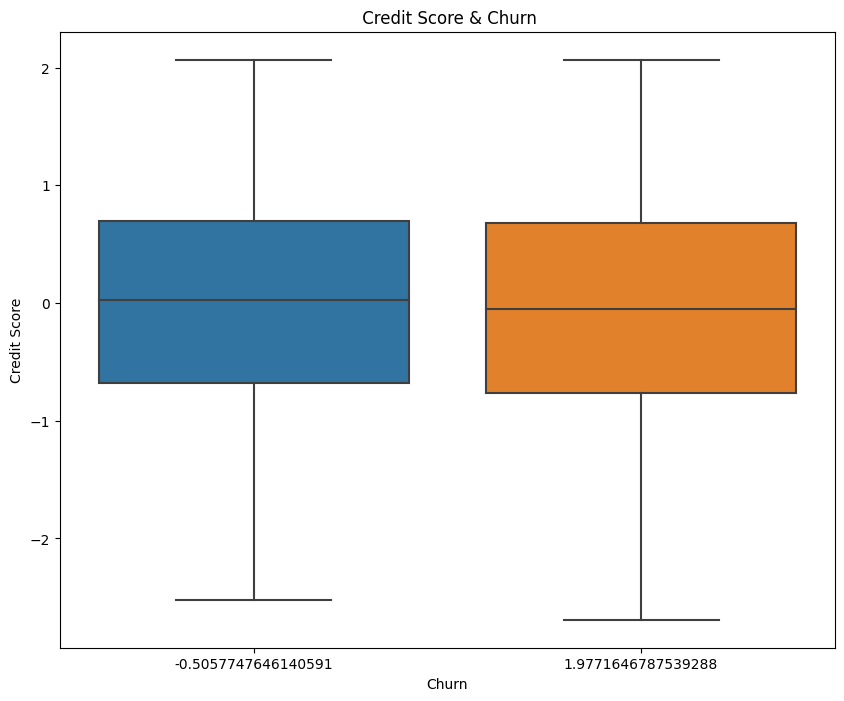

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=cleaned_data, x="Exited", y="CreditScore")
plt.title(" Credit Score & Churn")
plt.xlabel("Churn")
plt.ylabel("Credit Score")
plt.show()

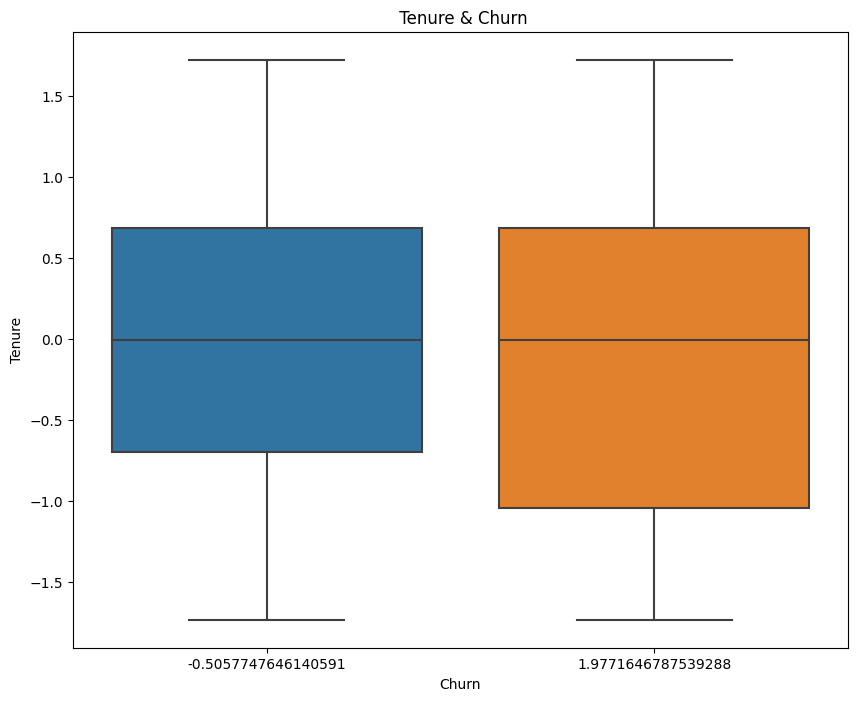

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=cleaned_data, x="Exited", y="Tenure")
plt.title(" Tenure & Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

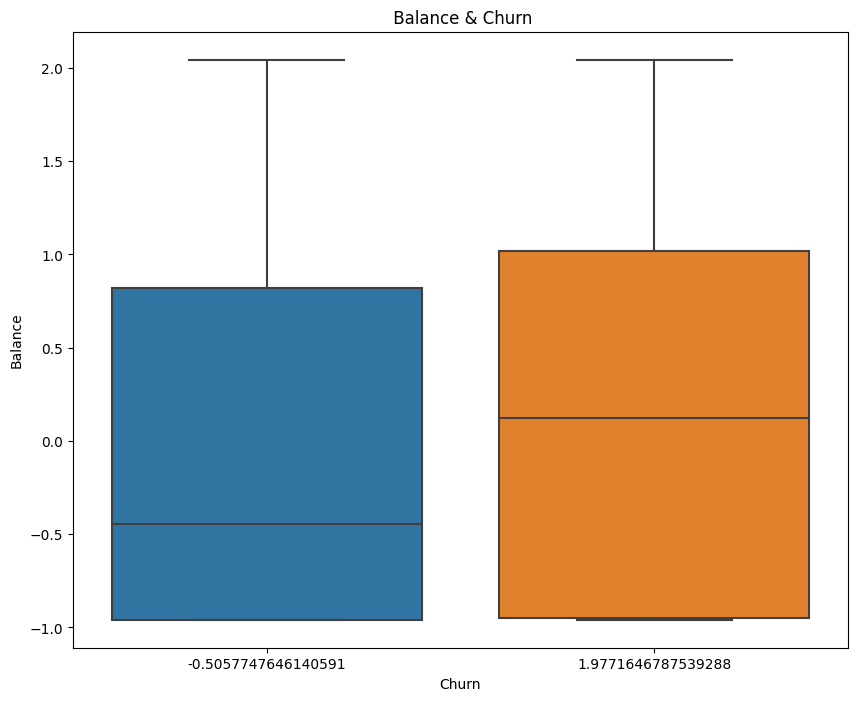

In [30]:

plt.figure(figsize=(10, 8))
sns.boxplot(data=cleaned_data, x="Exited", y="Balance")
plt.title(" Balance & Churn")
plt.xlabel("Churn")
plt.ylabel("Balance")
plt.show()

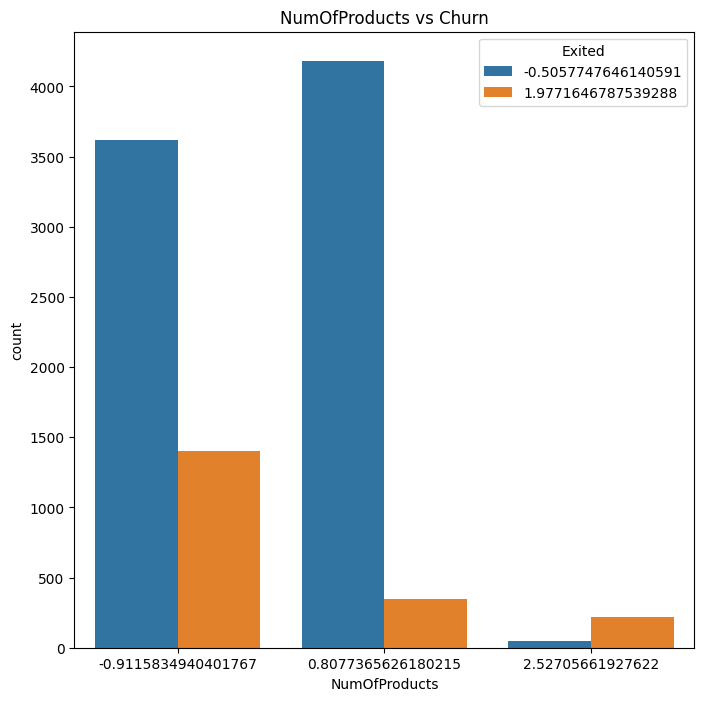

In [31]:
plt.figure(figsize=(8, 8))
sns.countplot(data=cleaned_data, x="NumOfProducts", hue="Exited")
plt.title("NumOfProducts vs Churn")
plt.show()


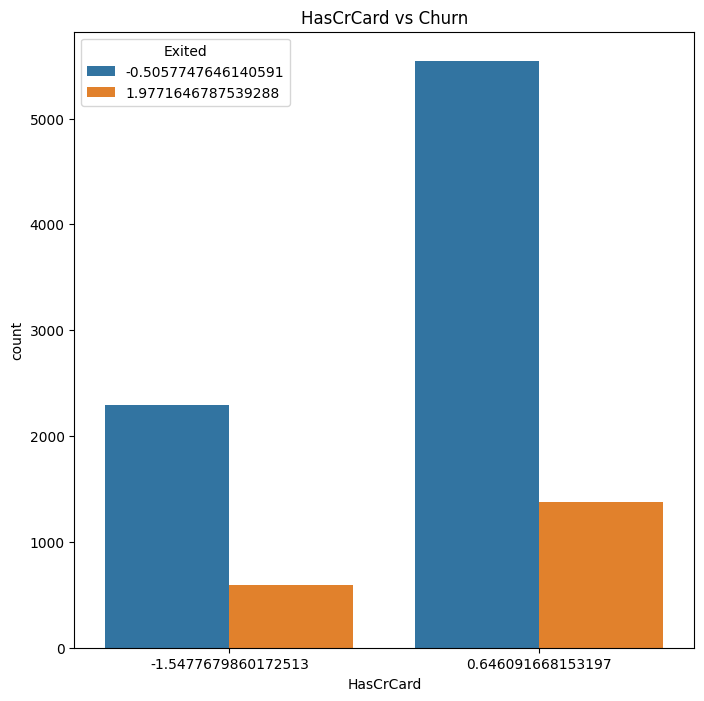

In [32]:
plt.figure(figsize=(8, 8))
sns.countplot(data=cleaned_data, x="HasCrCard", hue="Exited")
plt.title("HasCrCard vs Churn")
plt.show()

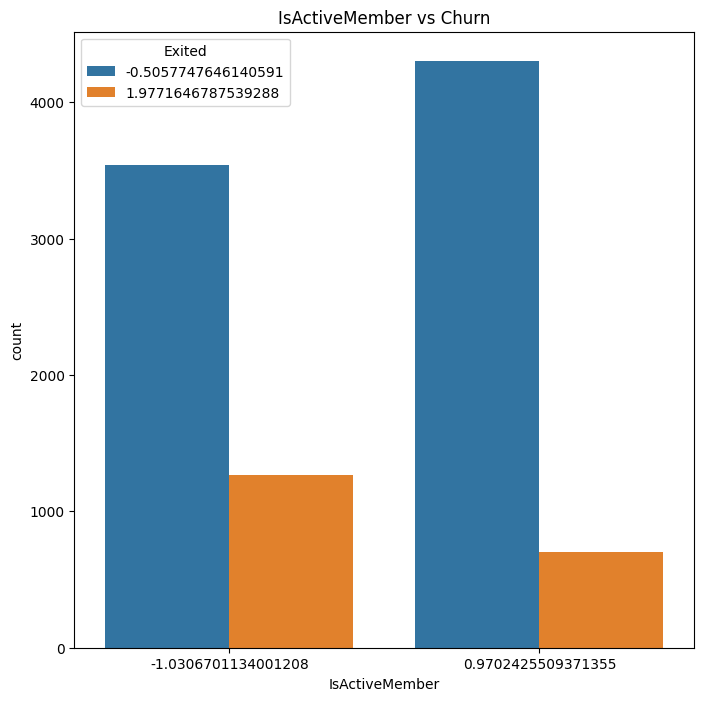

In [33]:
plt.figure(figsize=(8, 8))
sns.countplot(data=cleaned_data, x="IsActiveMember", hue="Exited")
plt.title("IsActiveMember vs Churn")
plt.show()

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
X_age = cleaned_data[['Age']]
n_bins = 6
strategy = 'uniform'
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)


X_age_binned = bin_encoder.fit_transform(X_age)


binned_df = pd.DataFrame(X_age_binned, columns=['Age_bin'])


churn_binned = pd.concat([cleaned_data, binned_df], axis=1)

print(churn_binned.head())

   RowNumber  CustomerId   Surname  CreditScore  Geography    Gender  \
0  -1.731878   -0.784099 -0.464183    -0.327331  -0.901886 -1.095988   
1  -1.731531   -0.603273 -0.390911    -0.441331   1.515067 -1.095988   
2  -1.731185   -1.003031  0.628988    -1.539876  -0.901886 -1.095988   
3  -1.730838    0.150862 -1.440356     0.501759  -0.901886 -1.095988   
4  -1.730492    0.658006  0.371354     2.066668   1.515067 -1.095988   

        Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  0.293793 -1.041760 -0.958432      -0.911583   0.646092        0.970243   
1  0.198387 -1.387538 -0.608805      -0.911583  -1.547768        0.970243   
2  0.293793  1.032908  1.767524       2.527057   0.646092       -1.030670   
3  0.007575 -1.387538 -0.958432       0.807737  -1.547768       -1.030670   
4  0.389199 -1.041760  0.780759      -0.911583   0.646092        0.970243   

   EstimatedSalary    Exited     churn  Age_bin  
0         0.024035  1.977165  1.977165      2.0  
1   

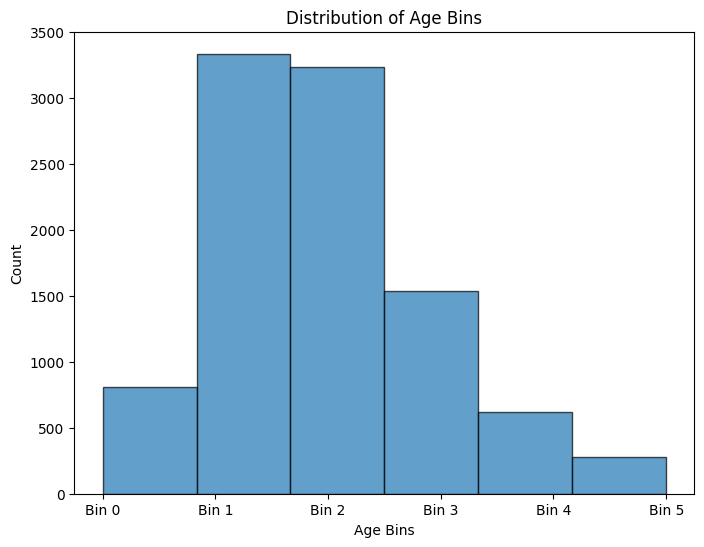

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(churn_binned['Age_bin'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Distribution of Age Bins')
plt.xticks(range(n_bins), [f'Bin {i}' for i in range(n_bins)])
plt.show()

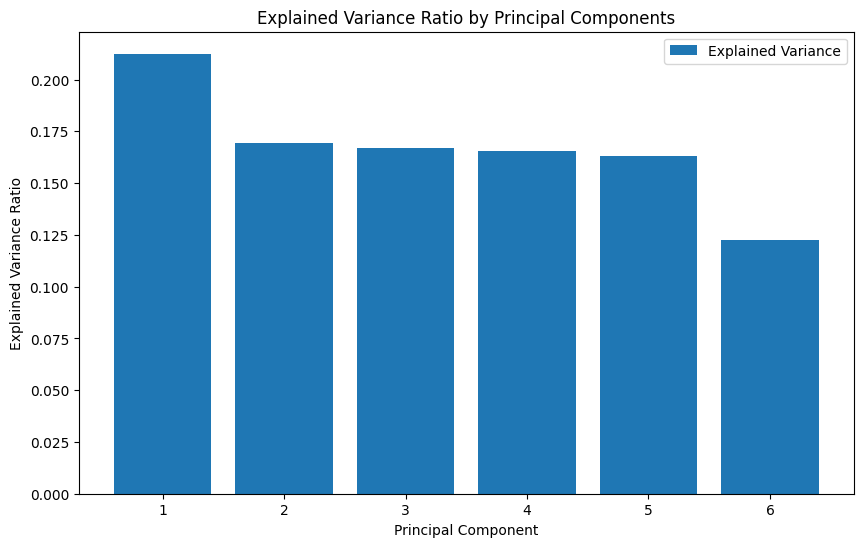

Explained Variance for PC1: 0.2125
Explained Variance for PC2: 0.1694
Explained Variance for PC3: 0.1670
Explained Variance for PC4: 0.1654
Explained Variance for PC5: 0.1630
Explained Variance for PC6: 0.1227
   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          0        2736     1115          228          0       0   24   
1          1        3258     1177          217          2       0   23   
2          2        2104     2040          111          0       0   24   
3          3        5435      289          308          0       0   21   
4          4        6899     1822          459          2       0   25   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              0          1               1             5068   
1       1      743              0          0               1             5639   
2       8     5793              2          1               0             5707   
3       1        0   

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(cleaned_data[numeric_columns])

pca = PCA()
pca_result = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.show()

for i, ratio in enumerate(explained_variance, start=1):
  print(f"Explained Variance for PC{i}: {ratio:.4f}")
n_components = 3
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_with_pca = pd.concat([df, pca_df], axis=1)
print(df_with_pca.head())
